In [11]:
import os
import string

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import AvantgardeModelUtils

reload(AvantgardeModelUtils)
from AvantgardeModelUtils import *
import metrics

reload(metrics)
from metrics import *

#TODO: adjust paths for your environment
datadir = "/home/quante/mnt/cluster/p/projects/compacts/projects/DeMo/social_agent_based_modelling/data"
figuredir = "/home/quante/PIK_Cloud/paper/genericSocialDynamics/figures"


gamma_means = np.linspace(0.35,0.95,13)

sigma_values = np.linspace(0.05,0.20,4)

file_uniform = os.path.join(datadir, "distributions/agent_data_1000steps.csv")

gamma_files = {}

sigma = 0.1
for gamma in gamma_means:
    gamma_files[format(gamma, ".2f")] = os.path.join(datadir, "self_reliance_large_ensembles/agent_data_normal-self_reliance_mu-"+format(gamma, ".2f")+"_sigma-"+format(sigma, ".3f")+".csv")

#plotting parameters
fontsize = 12
cm = 1 / 2.54

columns = ["step", "id", "attitude", "self_reliance", "fixed_attitude", "seed"]
uniform_columns = ["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"]

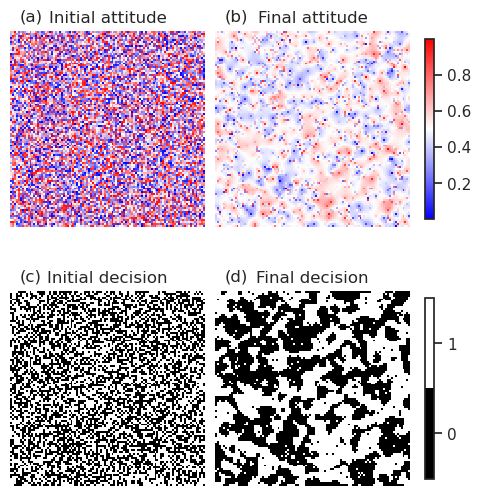

In [3]:
data_uniform = LoadSimulation(file_uniform, columns=uniform_columns)
sample_uniform = data_uniform.query("seed == 100")

cmap_black_white = LinearSegmentedColormap.from_list('Custom', ((0, 0, 0), (1, 1, 1)), 2)
sns.set(style="white", color_codes=True)

fig, axs = plt.subplots(2, 2, figsize=(16 * cm, 16 * cm), sharex=True, sharey=True)

startStep = 0
endStep = 1000
im1 = sns.heatmap(Grid(Choice(sample_uniform, startStep)),
                  ax=axs[0, 0],
                  square=True,
                  cbar=False,
                  cmap="bwr")
axs[0, 0].set_title('Initial attitude', size=fontsize);
axs[0, 0].text(0.05, 1.05, "(a)", transform=axs[0, 0].transAxes, size=fontsize)

im2 = sns.heatmap(Grid(Choice(sample_uniform, endStep)),
                  ax=axs[0, 1],
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap="bwr")
axs[0, 1].set_title('Final attitude', size=fontsize);
axs[0, 1].text(0.05, 1.05, "(b)", transform=axs[0, 1].transAxes, size=fontsize)

im3 = sns.heatmap(Grid(Choice(sample_uniform, startStep)),
                  ax=axs[1, 0],
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap=cmap_black_white)
axs[1, 0].set_title('Initial decision', size=fontsize);
axs[1, 0].text(0.05, 1.05, "(c)", transform=axs[1, 0].transAxes, size=fontsize)

im4 = sns.heatmap(Grid(Choice(sample_uniform, endStep)),
                  ax=axs[1, 1],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap=cmap_black_white)
axs[1, 1].set_title('Final decision', size=fontsize);
axs[1, 1].text(0.05, 1.05, "(d)", transform=axs[1, 1].transAxes, size=fontsize)

fig.subplots_adjust(wspace=0.05, hspace=0.15)

mappable = im1.get_children()[0]
fig.colorbar(mappable, ax=axs[0, :], shrink=.8, orientation='vertical', pad=0.03)

mappable_decision = im3.get_children()[0]
colorbar = fig.colorbar(mappable_decision, ax=axs[1, :], shrink=.8, orientation='vertical', pad=0.03)
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['0', '1'])

plt.savefig(os.path.join(figuredir, "example_initial_final.pdf"), dpi=300)


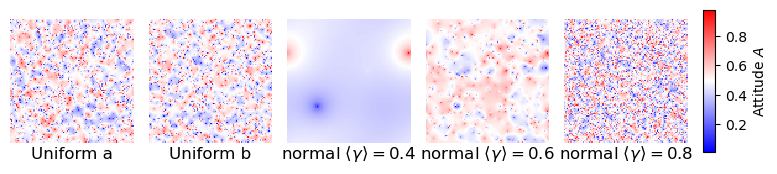

In [10]:
# plot results for different states
####################################


data_uniform = LoadSimulation(file_uniform, columns=uniform_columns).query("step == 1000")



data_low_gamma = LoadSimulation(gamma_files["0.40"], columns=columns).query("step == 1000")
data_mid_gamma = LoadSimulation(gamma_files["0.60"], columns=columns).query("step == 1000")
data_high_gamma = LoadSimulation(gamma_files["0.80"], columns=columns).query("step == 1000")

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(20 * cm, 5 * cm))
gs = GridSpec(nrows=1, ncols=6, width_ratios=[1, 1, 1, 1, 1, 0.1])

ax = [fig.add_subplot(gs[0, i]) for i in range(5)]


colors = ((0, 0, 0), (1, 1, 1))
cmap_black_white = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

im1 = sns.heatmap(Grid(data_uniform.query("seed==103").get("affinity").values),
                  ax=ax[0],
                  yticklabels=False,
                  xticklabels=False,
                  square=True,
                  cbar=False,
                  cmap="bwr")

im1 = sns.heatmap(Grid(data_uniform.query("seed==102").get("affinity").values),
                  ax=ax[1],
                  yticklabels=False,
                  xticklabels=False,
                  square=True,
                  cbar=False,
                  cmap="bwr")

im2 = sns.heatmap(Grid(data_low_gamma.query("seed==100").get("attitude").values),
                  ax=ax[2],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")

im3 = sns.heatmap(Grid(data_mid_gamma.query("seed==100").get("attitude").values),
                  ax=ax[3],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")

im4 = sns.heatmap(Grid(data_high_gamma.query("seed==100").get("attitude").values),
                  ax=ax[4],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")

fig.subplots_adjust(wspace=0.05, hspace=0.1, left=0.0, right=1.)

mappable = im1.get_children()[0]
fig.colorbar(mappable, cax=fig.add_subplot(gs[0, 5]), shrink=.9, orientation='vertical', label="Attitude $A$")

ax[0].set_title("Uniform a", y=-0.2)
ax[1].set_title("Uniform b", y=-0.2)
ax[2].set_title(r"normal $\langle \gamma \rangle = 0.4$", y=-0.2)
ax[3].set_title(r"normal $\langle \gamma \rangle = 0.6$", y=-0.2)
ax[4].set_title(r"normal $\langle \gamma \rangle = 0.8$", y=-0.2)

plt.tight_layout()
plt.savefig(os.path.join(figuredir, "results_changing_distributions.pdf"), dpi=300)

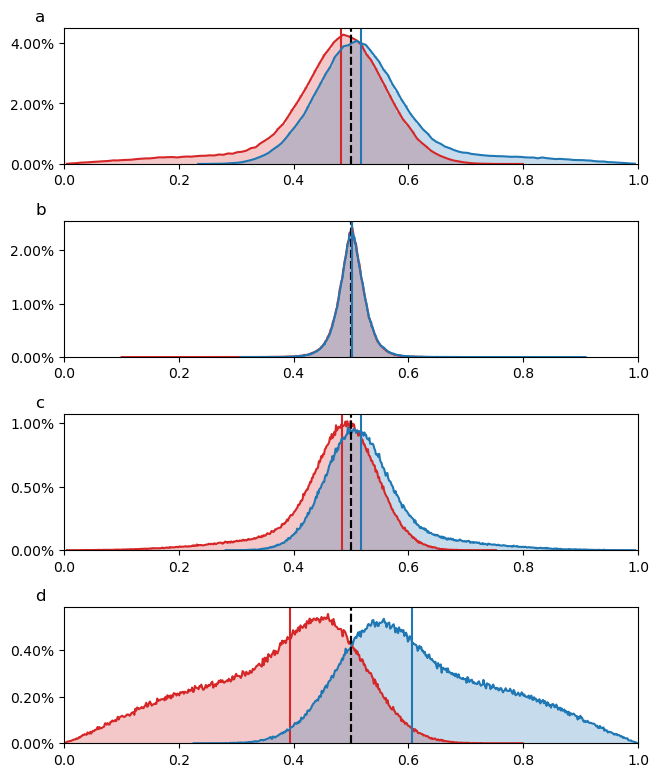

In [13]:
from matplotlib.ticker import PercentFormatter

cmap = plt.get_cmap('Set2')
gammacolors = [cmap(i) for i in range(6)]
data_uniform = LoadSimulation(file_uniform, columns=uniform_columns)
data_uniform_final = data_uniform.query("step == 1000")

gamma_keys = ["0.50","0.70","0.90"]

fig, axs = plt.subplots(4, 1, figsize=(17 * cm, 20 * cm))
histogram(data_uniform_final.query("affinityGoal < 0.5").get("affinity").values, axs[0], "tab:red")
histogram(data_uniform_final.query("affinityGoal >= 0.5").get("affinity").values, axs[0], "tab:blue")
axs[0].text(-0.05, 1.05, "a", transform=axs[0].transAxes, size=fontsize)

for i,gamma in enumerate(gamma_keys):
    index = i+1
    gamma_data = LoadSimulation(gamma_files[gamma], columns=columns).query("step == 1000")
    
    histogram(gamma_data.query("fixed_attitude < 0.5").get("attitude").values, axs[index],
          "tab:red", label="low $\gamma$ con", alpha=0.25, bins=500)
    histogram(gamma_data.query("fixed_attitude >= 0.5").get("attitude").values, axs[index],
          "tab:blue", label="low $\gamma$ pro", alpha=0.25, bins=500)
    axs[index].text(-0.05, 1.05, string.ascii_lowercase[index], transform=axs[index].transAxes, size=fontsize)

for ax in axs:
    ax.set_xlim(0.0, 1.0)

plt.tight_layout()
plt.savefig(os.path.join(figuredir, "inherent_decision_distribution.pdf"), dpi=300)

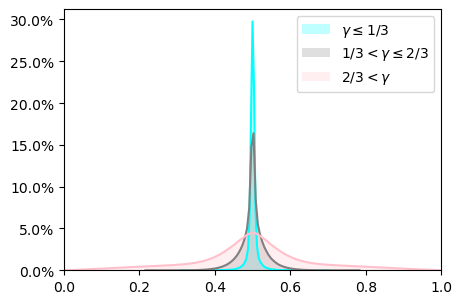

In [14]:
merged_data = pd.concat([LoadSimulation(gamma_files[key], columns=columns).query("step == 1000") for key in gamma_files])
fig, axs = plt.subplots(1, 1, figsize=(12 * cm, 8 * cm))
histogram(merged_data.query("self_reliance <= 1/3").get("attitude").values, axs,
          "cyan", label="$\gamma \leq 1/3$",median=False)
histogram(merged_data.query("self_reliance > 1/3").query("self_reliance <= 2/3").get("attitude").values, axs,
          "grey", label="$1/3 < \gamma \leq 2/3 $",median=False)
histogram(merged_data.query("self_reliance > 2/3").get("attitude").values, axs,
          "pink", label="$2/3 < \gamma$",median=False)

axs.legend()
axs.set_xlim([0,1])
plt.tight_layout()
plt.savefig(os.path.join(figuredir, "spread_by_self_reliance_bins.pdf"), dpi=300)

In [22]:
#load data, for index mapping griddimension is N for an NxN grid, defaults to 100
def process_file(file, griddimension=100):
    mapping = create_index_mapping(griddimension)
    print(f"Working on: {file}")
    data = LoadSimulation(file, columns=["seed", "id", "self_reliance", "attitude", "fixed_attitude", "step"])
    final_step_data = data.query("step == 1000")
    mean = final_step_data.get("self_reliance").mean()
    metrics = {}
    # get metrics
    metrics["friends_mean"] = []
    metrics["decision_mean"] = []
    for s, sample in final_step_data.groupby("seed"):
        metrics["friends_mean"].append(np.mean(np.array(friends_count(sample, mapping)) / 8))
        metrics["decision_mean"].append(np.mean(decision_alignment(sample).astype(float)))
    return mean, metrics

In [24]:
import warnings
warnings.filterwarnings('ignore')

dict_avantgarde_means = {}
results_by_distr_mean_avantgarde = {}

location = os.path.join(datadir, "self_reliance_large_ensembles")

fkey = "agent_data_normal-self_reliance"
#sigmas =  ["0.050","0.100", "0.150", "0.200"]
sigmas = ["0.100"]
for sigma in sigmas:
    files = []
    dict_avantgarde_means[sigma] = []
    for fname in os.listdir(location):
        if f"{sigma}" in fname and f"{fkey}" in fname:
            files.append(os.path.join(location, fname))
    for file in files:
        avantgarde_mean, metrics_dict = process_file(file)
        results_by_distr_mean_avantgarde[sigma, avantgarde_mean] = metrics_dict
        dict_avantgarde_means[sigma].append(avantgarde_mean)

Working on: /home/quante/mnt/cluster/p/projects/compacts/projects/DeMo/social_agent_based_modelling/data/self_reliance_large_ensembles/agent_data_normal-self_reliance_mu-0.45_sigma-0.100.csv
Working on: /home/quante/mnt/cluster/p/projects/compacts/projects/DeMo/social_agent_based_modelling/data/self_reliance_large_ensembles/agent_data_normal-self_reliance_mu-0.70_sigma-0.100.csv
Working on: /home/quante/mnt/cluster/p/projects/compacts/projects/DeMo/social_agent_based_modelling/data/self_reliance_large_ensembles/agent_data_normal-self_reliance_mu-0.75_sigma-0.100.csv
Working on: /home/quante/mnt/cluster/p/projects/compacts/projects/DeMo/social_agent_based_modelling/data/self_reliance_large_ensembles/agent_data_normal-self_reliance_mu-0.40_sigma-0.100.csv
Working on: /home/quante/mnt/cluster/p/projects/compacts/projects/DeMo/social_agent_based_modelling/data/self_reliance_large_ensembles/agent_data_normal-self_reliance_mu-0.90_sigma-0.100.csv
Working on: /home/quante/mnt/cluster/p/projec

In [54]:
def analytical_decision_alignment (gamma):
    prob_n_positive = 4/8
    prob_n_negative = prob_n_positive
    prob_n_zero = 1-prob_n_positive-prob_n_negative
    gamma_fraction = (1-gamma)*1/gamma
    n_positive_uniform_prob = np.minimum(1.0,np.maximum(0.0,(0.5-gamma_fraction)*2))

    return 0.5*prob_n_zero + prob_n_positive * (0.5*n_positive_uniform_prob+0.5) + prob_n_negative*(0.5*(n_positive_uniform_prob)+0.5)

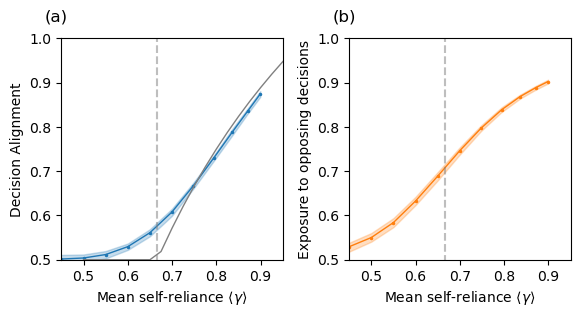

In [57]:

fig, axes = plt.subplots(1, 2, figsize=(15 * cm, 10 * cm))

gammas = np.arange(0.5,1.025,0.025)

confidence_interval_bounds = [5,95]

def get_y_values_ci (x_values,datadict,sigma,key,ci = confidence_interval_bounds):
    mean = []
    lower_ci = []
    upper_ci = []
    for x_value in x_values:
        values = datadict[sigma,x_value][key]
        mean.append(np.mean(values))
        lower_ci.append(np.percentile(values,ci[0]))
        upper_ci.append(np.percentile(values,ci[1]))
    return mean,lower_ci,upper_ci

for sigma in sigmas:
    
    x_values = np.sort(dict_avantgarde_means[sigma])
    
    y_values_decision_alingment = get_y_values_ci(x_values,results_by_distr_mean_avantgarde,sigma,"decision_mean")
    
    axes[0].plot(x_values, y_values_decision_alingment[0], color="tab:blue",lw=1,marker=".",ms=3)
    axes[0].fill_between(x_values, y_values_decision_alingment[1],y_values_decision_alingment[2], color="tab:blue",alpha=0.25)
    
    axes[0].set_ylabel("Decision Alignment")
    axes[0].set_ylim([0.5,1])
    
    y_values_friends_count = get_y_values_ci(x_values,results_by_distr_mean_avantgarde,sigma,"friends_mean")
    
    axes[1].plot(x_values, (np.array(y_values_friends_count[0])-1)*-1+0.5, color="tab:orange",lw=1,marker=".",ms=3)
    axes[1].fill_between(x_values, (np.array(y_values_friends_count[1])-1)*-1+0.5,(np.array(y_values_friends_count[2])-1)*-1+0.5, color="tab:orange",alpha=0.25)
    
    
    
    axes[1].set_ylabel("Exposure to opposing decisions")
    axes[1].set_ylim([0.5,1])

    axes[0].plot(gammas,analytical_decision_alignment(gammas),color="grey",lw=1)


from matplotlib.lines import Line2D

# Create custom legend handles and labels
legend_handles = [
    Line2D([0], [0], marker='s', color='tab:orange', linestyle="", markersize=6, label='Friends count'),
    Line2D([0], [0], marker='s', color='tab:blue', linestyle="", markersize=6, label='Decision Alignment'),
]


for i,ax in enumerate(axes):
    ax.plot([2 / 3, 2 / 3], [0, 1.1], color="tab:gray", linestyle="--", alpha=0.5)
    ax.set_xlabel(r"Mean self-reliance $\langle \gamma \rangle$")
    ax.set(aspect='equal')
    ax.set_xlim((0.45,0.95))
    ax.text(-0.075, 1.075, "("+chr(ord('a') + i)+")", transform=ax.transAxes, size=fontsize)
#ax.set_title(r"Decision alignment vs. Friends")
plt.tight_layout()
plt.savefig(os.path.join(figuredir, "alignment_friends_ci.pdf"), dpi=300)